### Process Data

In [3]:
import pandas as pd
# store variable names of interest
selected_vars = ['Location', 
                'Timestamp',
                'Average Occupancy',
                'Peak Occupancy',
                'Time Interval',
                'Location Path']

# import full 2019 BRFSS dataset
# brfss = pd.read_csv('data/brfss2019.zip', compression = 'zip', usecols = selected_vars)

In [4]:
import pandas as pd
# from zipfile import ZipFile, Path

# pass in the specific file name 
# to the open method
# with ZipFile("fwddailynexusprarequestforlibraryflooroccupancydat.zip") as myzip:
    # data = myzip.open("OccupancyData--1Dec22-9Dec22.csv")

#Now, we can read in the data
df = pd.read_csv("OccupancyData--1Dec22-9Dec22.csv",header=5)
df.head()

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path
0,UCSB Library,12/01/2022 00:00,688,847,1hour,UCSB > UCSB Library
1,UCSB Library,12/01/2022 01:00,452,584,1hour,UCSB > UCSB Library
2,UCSB Library,12/01/2022 02:00,247,344,1hour,UCSB > UCSB Library
3,UCSB Library,12/01/2022 03:00,106,152,1hour,UCSB > UCSB Library
4,UCSB Library,12/01/2022 04:00,61,92,1hour,UCSB > UCSB Library


In [5]:
# import numpy as np
import pandas as pd
import glob
import os

path = r'fwddailynexusprarequestforlibraryflooroccupancydat' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,header=5) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one
concatenated_df.to_csv("Lib_hours.zip",compression="gzip")

In [6]:
df["Average Occupancy"].max()

2815

In [7]:
import pandas as pd 
selected_vars = ['Location','Timestamp','Average Occupancy','Peak Occupancy','Time Interval','Location Path']
floor = pd.read_csv("Lib_hours.zip", compression = 'gzip', usecols = selected_vars)
# floor.drop(columns='Unamed: 0')
floor

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path
0,UCSB Library,09/22/2021 16:00,12,2,1hour,UCSB > UCSB Library
1,UCSB Library,09/25/2021 12:00,30,39,1hour,UCSB > UCSB Library
2,UCSB Library,09/25/2021 13:00,21,27,1hour,UCSB > UCSB Library
3,UCSB Library,09/25/2021 14:00,91,199,1hour,UCSB > UCSB Library
4,UCSB Library,09/25/2021 15:00,73,84,1hour,UCSB > UCSB Library
...,...,...,...,...,...,...
177441,8th Floor GRS,01/31/2022 19:00,0,0,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...
177442,8th Floor GRS,01/31/2022 20:00,0,1,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...
177443,8th Floor GRS,01/31/2022 21:00,0,1,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...
177444,8th Floor GRS,01/31/2022 22:00,0,1,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...


adding quarter value to data frame

In [8]:
import numpy as np 
import pandas as pd 
quarters = pd.DataFrame(np.matrix(
    [['Fall 2021', '9/19/2021', '12/10/2021'],
    ['Winter 2022', '1/3/2022', '3/18/2022'],
    ['Spring 2022', '3/28/2022', '6/3/2022'],
    ['Summer 2022', '6/20/2022', '9/11/2022'],
    ['Fall 2022', '9/18/2023', '12/9/2023'],
    ['Winter 2023', '1/9/2023', '3/24/2023'],
    ['Spring 2023', '4/3/2023', '6/16/2023']]
    ), 
columns=['Quarter','Start','Stop'])
# creating id column, 
# quarters['ID'] = [1,2,3,4,5,6,7]
quarters

,Quarter,Start,Stop
0,Fall 2021,9/19/2021,12/10/2021
1,Winter 2022,1/3/2022,3/18/2022
2,Spring 2022,3/28/2022,6/3/2022
3,Summer 2022,6/20/2022,9/11/2022
4,Fall 2022,9/18/2023,12/9/2023
5,Winter 2023,1/9/2023,3/24/2023
6,Spring 2023,4/3/2023,6/16/2023


In [9]:
# if timestamp in between start and stop, add Quarter label to column, Undefined otherwise 
floor['Datetime'] =  pd.to_datetime(floor['Timestamp'], format='%m/%d/%Y %H:%M') 
quarters['Start'] = pd.to_datetime(quarters['Start'], format='%m/%d/%Y') 
quarters['Stop'] = pd.to_datetime(quarters['Stop'], format='%m/%d/%Y') 
floor.head()

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime
0,UCSB Library,09/22/2021 16:00,12,2,1hour,UCSB > UCSB Library,2021-09-22 16:00:00
1,UCSB Library,09/25/2021 12:00,30,39,1hour,UCSB > UCSB Library,2021-09-25 12:00:00
2,UCSB Library,09/25/2021 13:00,21,27,1hour,UCSB > UCSB Library,2021-09-25 13:00:00
3,UCSB Library,09/25/2021 14:00,91,199,1hour,UCSB > UCSB Library,2021-09-25 14:00:00
4,UCSB Library,09/25/2021 15:00,73,84,1hour,UCSB > UCSB Library,2021-09-25 15:00:00


In [10]:
# create a new column of interval index based on the date range in quarters
intervals = pd.IntervalIndex.from_arrays(quarters['Start'], quarters['Stop'], closed='both')
# get the index of the interval for each row in floor
indexer = intervals.get_indexer(floor['Datetime'])
# use the category column of quarters to assign the corresponding label to each row in floor
floor['Quarter'] = quarters['Quarter'].iloc[indexer].values
floor.head()

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime,Quarter
0,UCSB Library,09/22/2021 16:00,12,2,1hour,UCSB > UCSB Library,2021-09-22 16:00:00,Fall 2021
1,UCSB Library,09/25/2021 12:00,30,39,1hour,UCSB > UCSB Library,2021-09-25 12:00:00,Fall 2021
2,UCSB Library,09/25/2021 13:00,21,27,1hour,UCSB > UCSB Library,2021-09-25 13:00:00,Fall 2021
3,UCSB Library,09/25/2021 14:00,91,199,1hour,UCSB > UCSB Library,2021-09-25 14:00:00,Fall 2021
4,UCSB Library,09/25/2021 15:00,73,84,1hour,UCSB > UCSB Library,2021-09-25 15:00:00,Fall 2021


add quarter and geometry columns
talk to bops/library staff 
pra request update? 

### Time Series Analysis 
* https://machinelearningmastery.com/time-series-data-visualization-with-python/ 
* https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
* https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af 
(for interactivity)

* sliders: https://plotly.com/python/sliders/ 
* spectral analysis: see Time Series material

In [1]:
# https://machinelearningmastery.com/time-series-data-visualization-with-python/ 
# https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0

/var/folders/5_/dpt6cl3j4fs4w5184wqyd8_r0000gn/T/ipykernel_28262/1770351687.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


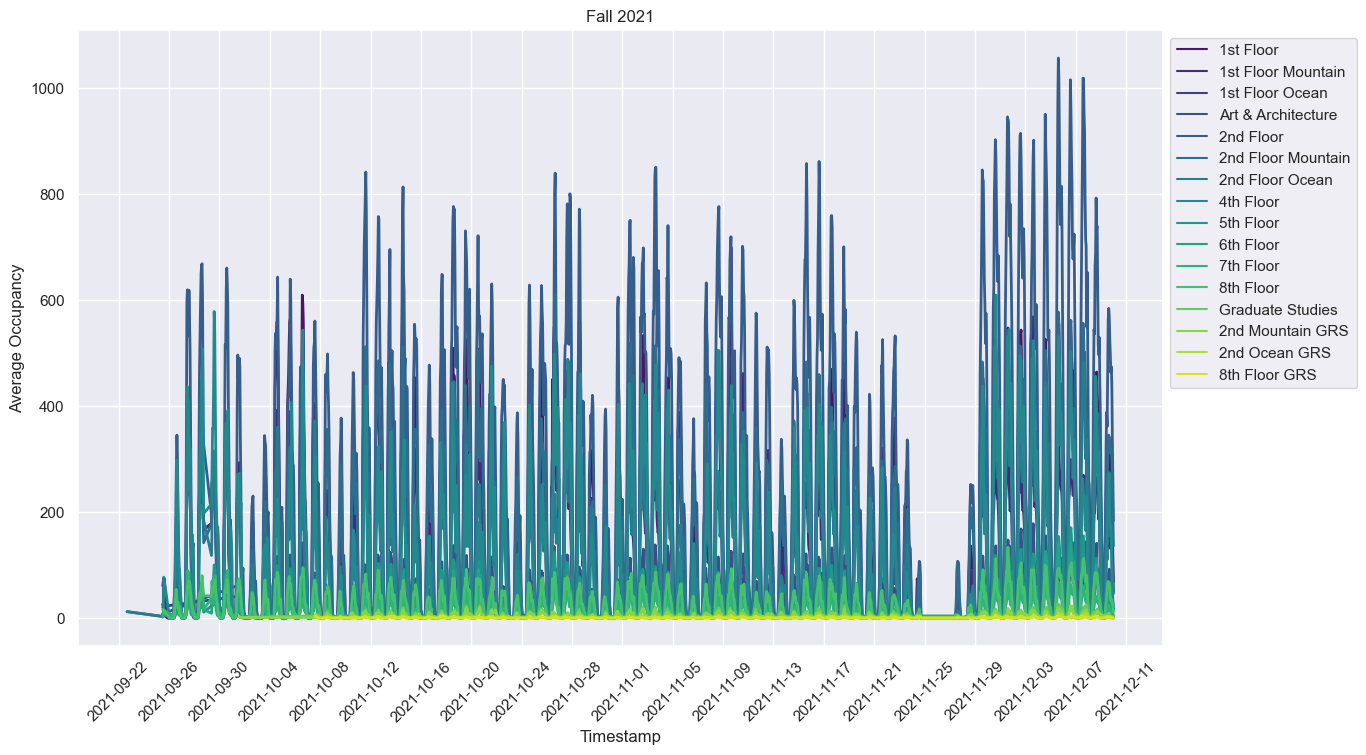

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# testing this out, will find a way to "optimize" later 
new_floor = floor[~(floor['Location'] == 'UCSB Library')]
new_floor_f21 = new_floor[new_floor['Quarter'] == 'Fall 2021']

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=new_floor_f21, x ='Datetime', y = 'Average Occupancy',
                    hue='Location', palette='viridis',
                    legend='full', lw=2)

# reassign/group tick labels 
# stagger or spread out date time ticks 
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average Occupancy')
plt.xlabel('Timestamp')
plt.title('Fall 2021')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


requirements.txt for environment replication
* run ! pip install requirements.txt